In [1]:
import pandas as pd #importing pandas libarary 
df=pd.read_csv("student-mat.csv",sep=";") #reading the csv file in object df using sep bcz data is using ; as sperator instead of , 
df.head()#display the first 5 rows 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
#Data exploration 
df.isnull().sum() #check for missing value  

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
df.dtypes #column data types

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
df.shape #understand dataset size

(395, 33)

In [11]:
#data cleaning 
#filling missing values (replace with median or remvoe them )
df.fillna(df.select_dtypes(include='number').median(),inplace=True)#replacing numericals values with median 


In [12]:
df.dropna(inplace=True) #removing non numerical nun columns form dataset

In [14]:
df.drop_duplicates(inplace=True) #removing duplicate columns 

In [15]:
#data analysis
avs=df['G3'].mean()#tells avg score of the data 
print(f"Average G3:",avs)

Average G3: 10.415189873417722


In [18]:
#counting students scoring above 15
av15=(df['G3']>15).sum() #adds the columns with grade more than 15
print(f"Students scoring above 15:",av15)

Students scoring above 15: 40


In [20]:
#finding correlation between study time and G3
corrr=df['studytime'].corr(df['G3'])
print(f"Correlation between study time and final grade:",corrr)

Correlation between study time and final grade: 0.09781968965319626


In [21]:
#yes we can see there is a small but a positive correlation between the two means when we study more we 
#which gender has a higher avg g3
AGG=df.groupby('sex')['G3'].mean()
print(AGG)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


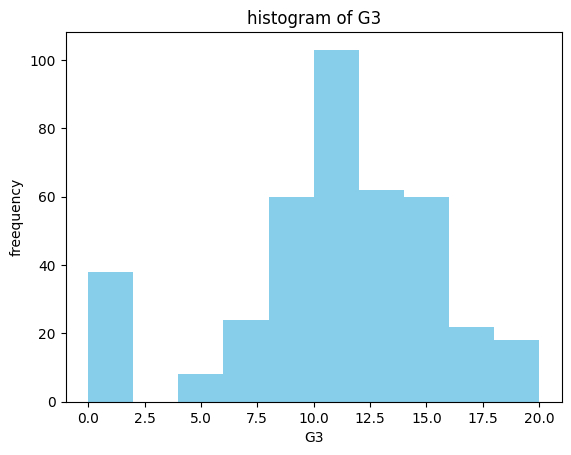

In [22]:
#data visualization 
import matplotlib.pyplot as plt #importing pyplot from libarary matplotlib
#histogram of G3
plt.hist(df['G3'],bins=10,color='skyblue')
plt.title('histogram of G3')
plt.xlabel("G3")
plt.ylabel("freequency")
plt.show()

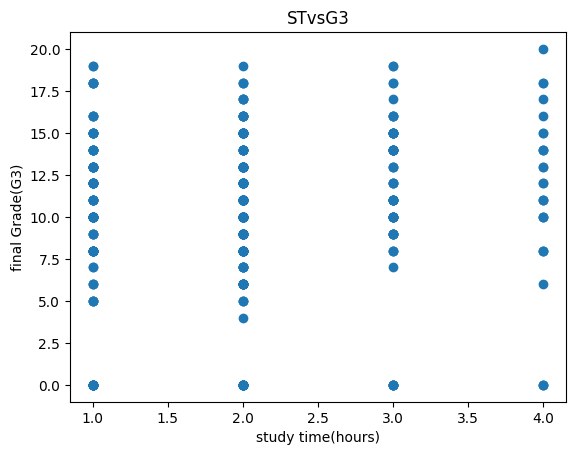

In [23]:
plt.figure() # creating new figure so that graphs dont overlap each other 
#scatter plot between study time and G3
plt.scatter(df['studytime'],df['G3'])
plt.title('STvsG3')
plt.xlabel('study time(hours)')
plt.ylabel('final Grade(G3)')
plt.show()

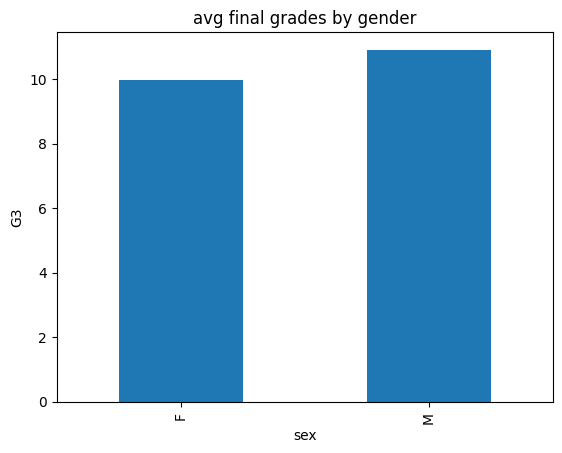

In [24]:
plt.figure()#making another plot 
#bar chart between avg scores of male and female studnets 
AGG.plot(kind='bar')
plt.title("avg final grades by gender")
plt.ylabel("G3")
plt.show()